# Cleaning the dataset

In [2]:
import pandas as pd

In [3]:
path = "C:/Users/ayaan/OneDrive/Desktop/DATASETS/Statewide_Contract__Master_Contract__Sales_Data_by_Customer__Contract__Vendor.csv"
df = pd.read_csv(path)


In [4]:
df.head()

,Customer Type,Customer Name,Contract Number,Contract Title,Vendor Name,Calendar Year,Q1 Sales Reported,Q2 Sales Reported,Q3 Sales Reported,Q4 Sales Reported,OMWBE,Vet Owned,Small Business,Diverse Options
0,Higher Ed (State Agency),YAKIMA VALLEY COLLEGE,111,Fertilizers,WILBUR-ELLIS COMPANY LLC,2015,0,0,0,1239,N,N,N,N
1,State Agency,NATURAL RESOURCES DEPT OF,111,Fertilizers,WILBUR-ELLIS COMPANY LLC,2015,0,0,0,1092,N,N,N,N
2,Higher Ed (State Agency),COMM COLLEGES OF SPOKANE,111,Fertilizers,WILBUR-ELLIS COMPANY LLC,2015,0,1604,0,0,N,N,N,N
3,School Districts,BELLEVUE SCH DIST 405,111,Fertilizers,WILBUR-ELLIS COMPANY LLC,2015,3133,2089,0,1031,N,N,N,N
4,Higher Ed (State Agency),EASTERN WASH UNIV,111,Fertilizers,WILBUR-ELLIS COMPANY LLC,2015,0,6137,0,10004,N,N,N,N


In [5]:
df.tail()

,Customer Type,Customer Name,Contract Number,Contract Title,Vendor Name,Calendar Year,Q1 Sales Reported,Q2 Sales Reported,Q3 Sales Reported,Q4 Sales Reported,OMWBE,Vet Owned,Small Business,Diverse Options
216741,Federal Government,HEALTH & HUMAN SERVICES DEPT,29723,"Doors, Frames, & Hardware",ANIXTER INC.,2024,0,0,0,116,N,N,N,Y
216742,Cities Including Towns,PASCO CITY OF,29723,"Doors, Frames, & Hardware",ANIXTER INC.,2024,0,0,0,568,N,N,N,Y
216743,Enterprise Services,ENTERPRISE SERVICES DEPT OF,29723,"Doors, Frames, & Hardware",ANIXTER INC.,2024,0,0,0,3175,N,N,N,Y
216744,County,CLARK COUNTY,29723,"Doors, Frames, & Hardware",ANIXTER INC.,2024,0,0,0,4282,N,N,N,Y
216745,Customers,NaN,29723,"Doors, Frames, & Hardware","RAE SECURITY, INC",2024,0,0,0,0,N,N,N,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216746 entries, 0 to 216745
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Customer Type      216746 non-null  object
 1   Customer Name      204442 non-null  object
 2   Contract Number    216746 non-null  int64 
 3   Contract Title     216746 non-null  object
 4   Vendor Name        216746 non-null  object
 5   Calendar Year      216746 non-null  int64 
 6   Q1 Sales Reported  216746 non-null  int64 
 7   Q2 Sales Reported  216746 non-null  int64 
 8   Q3 Sales Reported  216746 non-null  int64 
 9   Q4 Sales Reported  216746 non-null  int64 
 10  OMWBE              216746 non-null  object
 11  Vet Owned          216746 non-null  object
 12  Small Business     216746 non-null  object
 13  Diverse Options    216746 non-null  object
dtypes: int64(6), object(8)
memory usage: 23.2+ MB


In [7]:
df.columns

Index(['Customer Type', 'Customer Name', 'Contract Number', 'Contract Title',
       'Vendor Name', 'Calendar Year', 'Q1 Sales Reported',
       'Q2 Sales Reported', 'Q3 Sales Reported', 'Q4 Sales Reported', 'OMWBE',
       'Vet Owned', 'Small Business', 'Diverse Options'],
      dtype='object')

In [8]:
l=df.columns
print("Number of columns = ",len(l))

Number of columns =  14


In [9]:
print("Number of missing values per column is as follows :--", df.isnull().sum())

Number of missing values per column is as follows :-- Customer Type            0
Customer Name        12304
Contract Number          0
Contract Title           0
Vendor Name              0
Calendar Year            0
Q1 Sales Reported        0
Q2 Sales Reported        0
Q3 Sales Reported        0
Q4 Sales Reported        0
OMWBE                    0
Vet Owned                0
Small Business           0
Diverse Options          0
dtype: int64


In [10]:
df=df.dropna(subset=["Customer Name"])

In [11]:
print(df.isnull().sum())

Customer Type        0
Customer Name        0
Contract Number      0
Contract Title       0
Vendor Name          0
Calendar Year        0
Q1 Sales Reported    0
Q2 Sales Reported    0
Q3 Sales Reported    0
Q4 Sales Reported    0
OMWBE                0
Vet Owned            0
Small Business       0
Diverse Options      0
dtype: int64


In [12]:
print(df.duplicated().sum())

0


In [13]:
print(df.dtypes)

Customer Type        object
Customer Name        object
Contract Number       int64
Contract Title       object
Vendor Name          object
Calendar Year         int64
Q1 Sales Reported     int64
Q2 Sales Reported     int64
Q3 Sales Reported     int64
Q4 Sales Reported     int64
OMWBE                object
Vet Owned            object
Small Business       object
Diverse Options      object
dtype: object


In [14]:
sales_columns=["Q1 Sales Reported", "Q2 Sales Reported" , "Q3 Sales Reported" , "Q4 Sales Reported"]
print(df[sales_columns].dtypes)

Q1 Sales Reported    int64
Q2 Sales Reported    int64
Q3 Sales Reported    int64
Q4 Sales Reported    int64
dtype: object


# Visualising Yearly trend

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

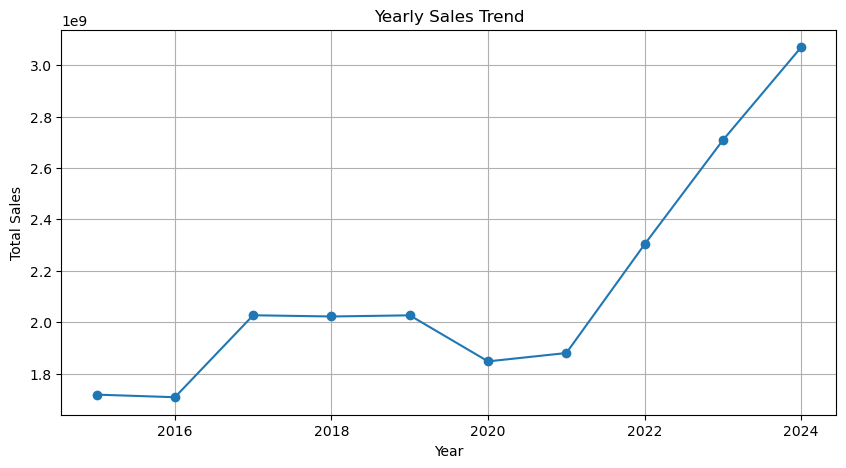

In [16]:
import matplotlib.pyplot as plt
df["Total Sales"] = df["Q1 Sales Reported"] + df["Q2 Sales Reported"] + df["Q3 Sales Reported"] + df["Q4 Sales Reported"]
yearly_sales = df.groupby("Calendar Year")["Total Sales"].sum()
plt.figure(figsize=(10,5))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Yearly Sales Trend")
plt.grid(True)
plt.show()


# Training a Linear Regression Model on the dataset

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
yearly_sales = df.groupby("Calendar Year")["Total Sales"].sum().reset_index() #this line ensures that Calender Year is acessed as a column


X = yearly_sales["Calendar Year"].values.reshape(-1, 1) 
y = yearly_sales["Total Sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #splitting into 70% to 30% 

model = LinearRegression()
model.fit(X_train, y_train)

year = np.array([[2025]])
predictedsales2025 = model.predict(year)[0]
print("Predicted Sales for 2025 = ",predictedsales2025)


Predicted Sales for 2025 =  2788808402.665863


In [ ]:
#getting around 27Billion predicted sales according to linear regression

In [ ]:
#to haandle increasing and decresing speeding trends a Poolynomial Regression model might work better

# Training a Polynomial Regression Model

In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

yearly_sales = df.groupby("Calendar Year")["Total Sales"].sum().reset_index()

X = yearly_sales["Calendar Year"].values.reshape(-1, 1) 
y = yearly_sales["Total Sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #30% to 70% split

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

future_year_poly = poly.transform(np.array([[2025]])) 
predictedsales2025pr = poly_model.predict(future_year_poly)[0]
print("Predicted Sales for 2025 = ",predictedsales2025pr)


Predicted Sales for 2025 =  3225073549.84375


In [ ]:
#We are getting around 32 Billion sales prediction according to Polynomial regression model

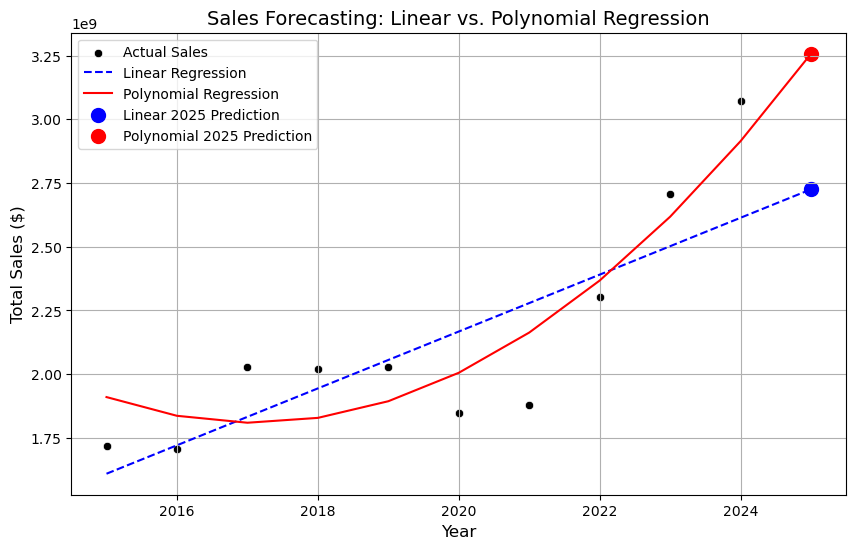

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
yearly_sales = df.groupby("Calendar Year")["Total Sales"].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=yearly_sales["Calendar Year"], y=yearly_sales["Total Sales"], color="black", label="Actual Sales")
future_years = np.arange(yearly_sales["Calendar Year"].min(), 2026, 1).reshape(-1, 1)
linear_trend = model.predict(future_years)  
plt.plot(future_years, linear_trend, label="Linear Regression", linestyle="--", color="blue")
poly_trend = poly_model.predict(poly.transform(future_years))
plt.plot(future_years, poly_trend, label="Polynomial Regression", linestyle="-", color="red")
plt.scatter(2025, predicted_sales_2025, color="blue", marker="o", s=100, label="Linear 2025 Prediction")
plt.scatter(2025, predicted_sales_2025_poly, color="red", marker="o", s=100, label="Polynomial 2025 Prediction")
plt.title("Sales Forecasting: Linear vs. Polynomial Regression", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()
